# Packages Loading


In [13]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import pandas as pd

from dataset.june_dataset import JuNEDataset
from metrics.metrics_graph import GraphMetrics



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read Data


In [14]:
path = Path("../data/all_data_06_09_2023.csv")
df_hack = pd.read_csv(path, index_col=0)
df_hack.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,NaN,NaN,NaN,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",NaN,student_7,False,NaN
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False,"helper_functions,"
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,"helper_functions,"
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False,"helper_functions,"
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,"helper_functions,"


In [15]:
june = JuNEDataset(df_hack)
june.prepare_dataset()
june.df.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label,task
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,None,None,None,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",None,student_7,False,None,task1
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,"helper_functions,",task1
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,"helper_functions,",task1
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,"helper_functions,",task1
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,"helper_functions,",task1


# Initialize Metrics Processor


In [16]:
processor = GraphMetrics()


# Metrics Calculation


In [17]:
grouped = june.df.groupby("kernel_id")
df_kernel = grouped.get_group(list(grouped.groups.keys())[0])
df_kernel.head()

,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label,task
1113,1113,2023-05-06 11:58:35.270,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,execute,e139884774504ae997d7e38e6be6da88,0.0,code,# # Do not forget to check if your notebook lo...,None,student_0,False,"helper_functions,",task1
1114,1114,2023-05-06 11:58:58.001,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,finished_execute,e139884774504ae997d7e38e6be6da88,0.0,code,# # Do not forget to check if your notebook lo...,"[{""output_type"":""stream"",""size"":23}]",student_0,False,"helper_functions,",task1
1115,1115,2023-05-06 11:58:58.174,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,save_notebook,None,None,None,"[\n {\n ""id"": ""e139884774504ae997d7e38e6be...",None,student_0,False,None,task1
1116,1116,2023-05-06 11:59:02.653,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,execute,a47800e62cbe40c1ad4003b2879f5f03,1.0,code,!pip install pandas\n,None,student_0,False,"helper_functions,",task1
1117,1117,2023-05-06 11:59:03.475,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,finished_execute,a47800e62cbe40c1ad4003b2879f5f03,2.0,code,!pip install pandas\n,"[{""output_type"":""stream"",""size"":649}]",student_0,False,"helper_functions,",task1


In [18]:
graph_metrics = processor.calculate_kernel_metrics(df_kernel)
graph_metrics.head()


,kernel_id,modularity,average_degree,average_clustering
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,0.283695,18.9,0.270952


In [19]:
graph_metrics = processor.calculate_metrics(june.df)
graph_metrics.head()


100%|██████████| 31/31 [00:19<00:00,  1.56it/s]


,kernel_id,modularity,average_degree,average_clustering
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,0.283695,18.900000,0.270952
0,033a2c63-4cfb-4cc5-9988-59c48a06eb23,0.580378,5.071429,0.127423
0,19160d7e-eb8e-4a81-9e92-e9d8335eee31,0.564548,10.238095,0.252116
0,232bcb48-7455-4109-9eeb-809649a6bedc,0.502743,12.985507,0.229112
0,29da7c56-5a69-485f-b181-a0a7199a559c,0.572181,7.943396,0.143793


In [20]:
df_tmp = june.df[['user_id', 'kernel_id', 'expert', 'task']].drop_duplicates(subset=['user_id', 'kernel_id', 'expert'], keep='last')

graph_metrics_merged = graph_metrics.merge(df_tmp, on='kernel_id')
graph_metrics_merged.head()


,kernel_id,modularity,average_degree,average_clustering,user_id,expert,task
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,0.283695,18.900000,0.270952,student_0,False,task1
1,033a2c63-4cfb-4cc5-9988-59c48a06eb23,0.580378,5.071429,0.127423,student_0,False,task1
2,19160d7e-eb8e-4a81-9e92-e9d8335eee31,0.564548,10.238095,0.252116,expert_5,True,task1
3,232bcb48-7455-4109-9eeb-809649a6bedc,0.502743,12.985507,0.229112,expert_1,True,task2
4,29da7c56-5a69-485f-b181-a0a7199a559c,0.572181,7.943396,0.143793,student_2,False,task1


In [23]:
metrics = list(processor.graph_metrics_mapping.keys())
graph_table = graph_metrics_merged.groupby(['task', 'expert'])[metrics].mean().round(2).applymap('{:.2f}'.format)
graph_table


modularity average_degree average_clustering
task  expert                                             
task1 False        0.52          11.58               0.20
      True         0.53          12.23               0.20
task2 False        0.47          11.08               0.23
      True         0.55           8.72               0.23

In [24]:
print(graph_table.to_latex(escape=True, multirow=True))


\begin{tabular}{lllll}
\toprule
 &  & modularity & average\_degree & average\_clustering \\
task & expert &  &  &  \\
\midrule
\multirow[t]{2}{*}{task1} & False & 0.52 & 11.58 & 0.20 \\
 & True & 0.53 & 12.23 & 0.20 \\
\cline{1-5}
\multirow[t]{2}{*}{task2} & False & 0.47 & 11.08 & 0.23 \\
 & True & 0.55 & 8.72 & 0.23 \\
\cline{1-5}
\bottomrule
\end{tabular}



In [30]:
graph_metrics_merged

,kernel_id,modularity,average_degree,average_clustering,user_id,expert,task
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,0.283695,18.900000,0.270952,student_0,False,task1
1,033a2c63-4cfb-4cc5-9988-59c48a06eb23,0.580378,5.071429,0.127423,student_0,False,task1
2,19160d7e-eb8e-4a81-9e92-e9d8335eee31,0.564548,10.238095,0.252116,expert_5,True,task1
3,232bcb48-7455-4109-9eeb-809649a6bedc,0.502743,12.985507,0.229112,expert_1,True,task2
4,29da7c56-5a69-485f-b181-a0a7199a559c,0.572181,7.943396,0.143793,student_2,False,task1
5,2bc4e2c9-833e-454f-8c6c-2dff1e6e60e9,0.569877,5.037037,0.285450,student_8,False,task2
6,2d945a8d-90c3-40a6-a576-f1b7cf5d6790,0.507680,13.304348,0.237088,expert_2,True,task1
7,3179a989-9b41-49b9-84f8-5fe83a7c65bf,0.563479,5.879699,0.131547,expert_0,True,task2
8,36c724d9-3a5f-43e2-aba2-2d0933046f35,0.530082,7.423423,0.317467,student_6,False,task1
9,388ef554-e3e7-4410-89ac-d6ad4aeaec6c,0.243400,27.875000,0.337004,student_7,False,task2


In [31]:

graph_metrics_merged.anova(dv="modularity", between=["expert", "task"]).round(3)


,Source,SS,DF,MS,F,p-unc,np2
0,expert,0.013,1.0,0.013,1.783,0.193,0.062
1,task,0.004,1.0,0.004,0.560,0.461,0.020
2,expert * task,0.007,1.0,0.007,1.061,0.312,0.038
3,Residual,0.190,27.0,0.007,NaN,NaN,NaN


In [33]:
graph_metrics_merged.anova(dv="average_degree", between=["expert", "task"]).round(3)


,Source,SS,DF,MS,F,p-unc,np2
0,expert,3.293,1.0,3.293,0.055,0.816,0.002
1,task,19.671,1.0,19.671,0.328,0.571,0.012
2,expert * task,15.003,1.0,15.003,0.251,0.621,0.009
3,Residual,1616.855,27.0,59.884,NaN,NaN,NaN


In [34]:
graph_metrics_merged.anova(dv="average_clustering", between=["expert", "task"]).round(3)


,Source,SS,DF,MS,F,p-unc,np2
0,expert,0.000,1.0,0.000,0.024,0.877,0.001
1,task,0.007,1.0,0.007,1.161,0.291,0.041
2,expert * task,0.000,1.0,0.000,0.013,0.910,0.000
3,Residual,0.167,27.0,0.006,NaN,NaN,NaN



# Display graph

In [25]:
from analysis.metrics.utils.graph_tools import dataframe_to_graphviz
from tqdm import tqdm

graphs = {}
grouped = june.df.groupby(['user_id', 'kernel_id'])

for (user_id, kernel_id), g in tqdm(grouped):
    df_kernel = g
    gv = dataframe_to_graphviz(df_kernel)
    gv.attr(rankdir='LR', size='100,100')
    gv.render(directory='figures/graphs',format='png', filename=f"graph_{user_id}", cleanup=True).replace('\\', '/')
    graphs[(user_id, kernel_id)] = gv


100%|██████████| 31/31 [00:30<00:00,  1.02it/s]


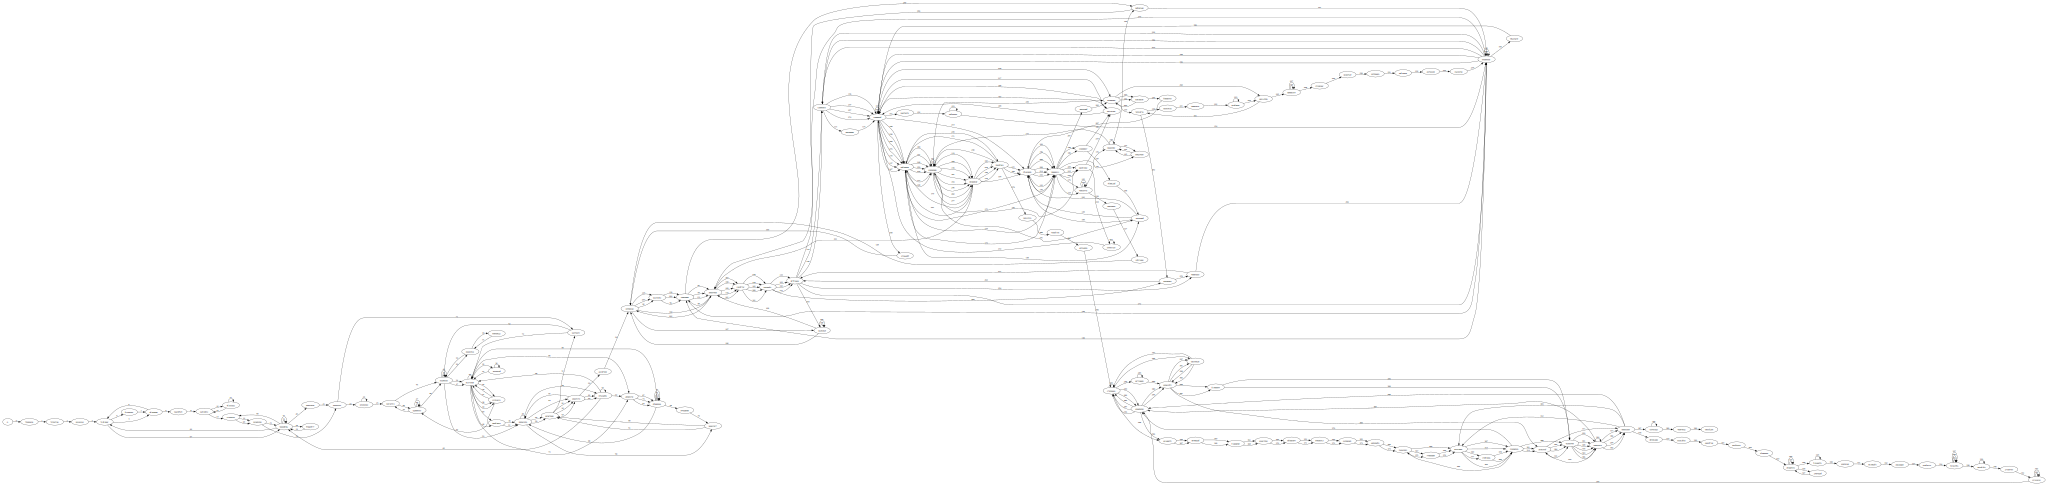

In [29]:
list(graphs.values())[0]
